In [1]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Creating a sample dataset
np.random.seed(42)
data = {
    'Region': np.random.choice(['North', 'South', 'East', 'West'], 1000),
    'Product_Category': np.random.choice(['Electronics', 'Clothing', 'Home Goods'], 1000),
    'Sales': np.random.normal(200, 50, 1000),
    'Profit': np.random.normal(50, 10, 1000),
    'Discount': np.random.choice([5, 10, 15, 20], 1000),
    'Date': pd.date_range(start='2023-01-01', periods=1000, freq='D')
}

df = pd.DataFrame(data)

# Display the first few rows of the dataset
df.head()

,Region,Product_Category,Sales,Profit,Discount,Date
0,East,Clothing,245.374738,41.344868,20,2023-01-01
1,West,Home Goods,201.794727,52.083553,20,2023-01-02
2,North,Electronics,293.250162,51.071602,10,2023-01-03
3,East,Electronics,241.024122,61.966908,5,2023-01-04
4,East,Electronics,255.185693,52.718732,5,2023-01-05


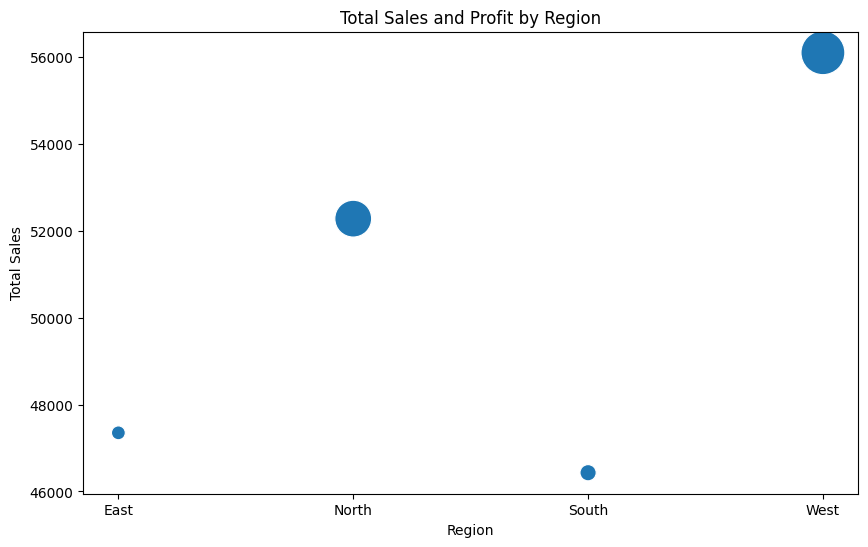

In [3]:
#We'll use position and size to show sales and profit by region. 
#The bubble plot is an excellent way to use these visual variables
# Aggregate the data by region
region_data = df.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Create a bubble plot using size to represent the profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=region_data, x='Region', y='Sales', size='Profit', sizes=(100, 1000), legend=False)
plt.title('Total Sales and Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

In this bubble plot, the position on the x-axis shows different regions, while 
the y-axis shows total sales. The size of the bubbles represents the total profit. 
This visualization quickly conveys which regions are driving the most sales and profit.

C:\Users\avais\AppData\Local\Temp\ipykernel_19004\421386672.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_data, x='Product_Category', y='Sales', palette='Set2')


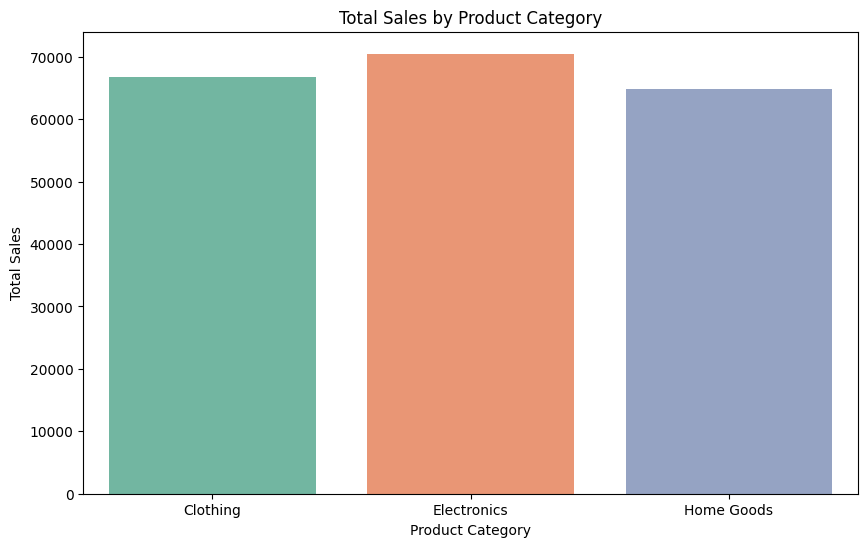

In [4]:
#color variable
# Aggregate the data by product category
category_data = df.groupby('Product_Category').agg({'Sales': 'sum'}).reset_index()

# Create a bar plot with color representing the product category
plt.figure(figsize=(10, 6))
sns.barplot(data=category_data, x='Product_Category', y='Sales', palette='Set2')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

The use of different colors helps to quickly identify and compare sales across product categories. 
This visual variable makes it easier to see which category contributes most to overall sales.

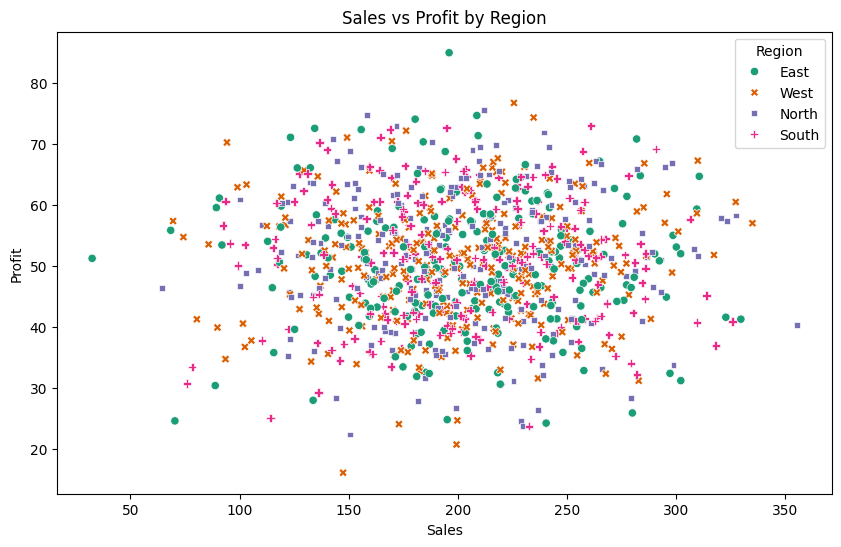

In [5]:
#Visual Variable - Shape
#Shape can be used to encode another dimension of data. Let's use shape to differentiate between regions in a 
#scatter plot that shows the relationship between sales and profit.

# Scatter plot with shape representing the region
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Region', style='Region', palette='Dark2')
plt.title('Sales vs Profit by Region')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

In this scatter plot, both color and shape differentiate regions, making it easier to distinguish how each region's 
sales relate to profit. This helps in comparing regions across two variables simultaneously.

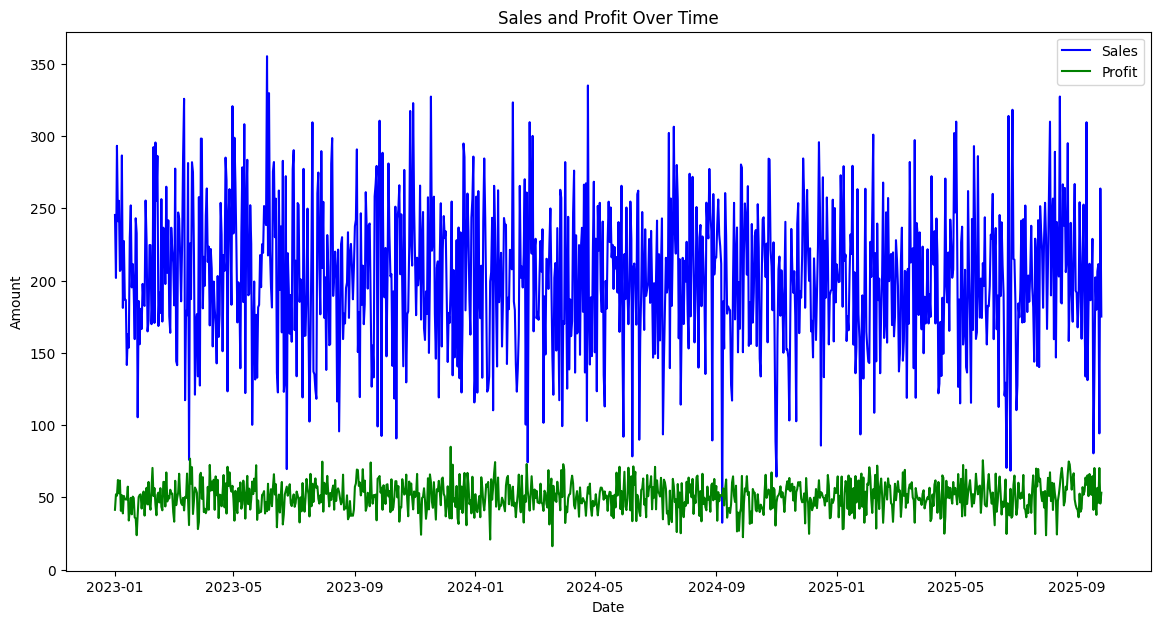

In [6]:
#Visual Variable - Orientation
#Orientation can be used to show direction or trend. We'll use a line plot to show how sales and profit have trended over time.

# Aggregate sales and profit by date
date_data = df.groupby('Date').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Plotting sales and profit trends over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=date_data, x='Date', y='Sales', label='Sales', color='blue')
sns.lineplot(data=date_data, x='Date', y='Profit', label='Profit', color='green')
plt.title('Sales and Profit Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.show()

The orientation of the lines in this plot reveals the trend over time, showing whether sales and profit are 
increasing or decreasing. It also allows us to see the relationship between the two metrics over time.

In [7]:
#Combining Visual Variables - Interactive Visualization
#Finally, we'll create an interactive visualization using multiple visual variables: position, color, size, and more.

# Create an interactive scatter plot with Plotly
fig = px.scatter(df, x='Sales', y='Profit', color='Region', size='Discount', 
                 hover_data=['Product_Category'], title='Sales vs Profit with Discounts')
fig.update_layout(xaxis_title='Sales', yaxis_title='Profit')
fig.show()


This interactive scatter plot combines several visual variables: position (Sales vs Profit), 
color (Region), size (Discount), and additional hover information (Product Category). 
Users can explore the data dynamically, uncovering deeper insights.

This notebook illustrates how visual variables such as position, size, color, shape, and orientation can be used effectively 
to tell a data-driven story. By carefully selecting and combining these visual variables, you can convey complex information 
in a clear and compelling way, making it easier for your audience to understand and act on the insights.